<a href="https://colab.research.google.com/github/gencross/NewtonGroup1/blob/main/Miles_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from numpy.polynomial.polynomial import polyder
from numpy.polynomial.polynomial import polyval
from numpy.polynomial.polynomial import polyroots
import pandas as pd
from PIL import Image

In [3]:
def derivative(p):
  '''Takes a list as input. The list represents the coefficients of a polynomial
  with degree equal to 1+length of list. Returns a list representing the 
  derivative of that polynomial.
  '''
  d = p
  for n in range(1,len(p)):
    d[n-1] = d[n] * n
  d[-1] = 0
  return d

derivative([1,2,3,4])

[2, 6, 12, 0]

In [4]:
def newton(P, start, steps=100):
  root = start
  P_deriv = polyder(P)
  for i in range(steps):
    root = root - (polyval(root,P) / polyval(root,P_deriv))
  return root

In [6]:
real_min = -2
real_max = 2
imag_min = -2
imag_max = 2
resolution = 200

x_array = np.linspace(real_min,real_max, resolution * (real_max-real_min) )
y_array = np.linspace(imag_min,imag_max, resolution * (imag_max-imag_min) )

c_array = np.add.outer(x_array,y_array*1j) #1j is the complex number we usually call i.

In [24]:
newton([-1,2,8,4],c_array)

array([[-0.65555391+0.j, -0.65555391+0.j, -0.65555391+0.j, ...,
        -0.65555391+0.j, -0.65555391+0.j, -0.65555391+0.j],
       [-0.65555391+0.j, -0.65555391+0.j, -0.65555391+0.j, ...,
        -0.65555391+0.j, -0.65555391+0.j, -0.65555391+0.j],
       [-0.65555391+0.j, -0.65555391+0.j, -0.65555391+0.j, ...,
        -0.65555391+0.j, -0.65555391+0.j, -0.65555391+0.j],
       ...,
       [ 0.24059715+0.j,  0.24059715+0.j,  0.24059715+0.j, ...,
         0.24059715+0.j,  0.24059715+0.j,  0.24059715+0.j],
       [ 0.24059715+0.j,  0.24059715+0.j,  0.24059715+0.j, ...,
         0.24059715+0.j,  0.24059715+0.j,  0.24059715+0.j],
       [ 0.24059715+0.j,  0.24059715+0.j,  0.24059715+0.j, ...,
         0.24059715+0.j,  0.24059715+0.j,  0.24059715+0.j]])

In [25]:
polyroots([-1,2,8,4])

array([-1.58504324, -0.65555391,  0.24059715])

In [12]:
I = newton([1,0,0,1], c_array)

In [18]:
newton([1,0,0,1], c_array)

array([[-1. +0.j       , -1. +0.j       , -1. +0.j       , ...,
        -1. +0.j       , -1. +0.j       , -1. +0.j       ],
       [-1. +0.j       , -1. +0.j       , -1. +0.j       , ...,
        -1. +0.j       , -1. +0.j       , -1. +0.j       ],
       [-1. +0.j       , -1. +0.j       , -1. +0.j       , ...,
        -1. +0.j       , -1. +0.j       , -1. +0.j       ],
       ...,
       [ 0.5-0.8660254j,  0.5-0.8660254j,  0.5-0.8660254j, ...,
         0.5+0.8660254j,  0.5+0.8660254j,  0.5+0.8660254j],
       [ 0.5-0.8660254j,  0.5-0.8660254j,  0.5-0.8660254j, ...,
         0.5+0.8660254j,  0.5+0.8660254j,  0.5+0.8660254j],
       [ 0.5-0.8660254j,  0.5-0.8660254j,  0.5-0.8660254j, ...,
         0.5+0.8660254j,  0.5+0.8660254j,  0.5+0.8660254j]])

In [14]:
polyroots([1,0,0,1])

array([-1. +0.j       ,  0.5-0.8660254j,  0.5+0.8660254j])

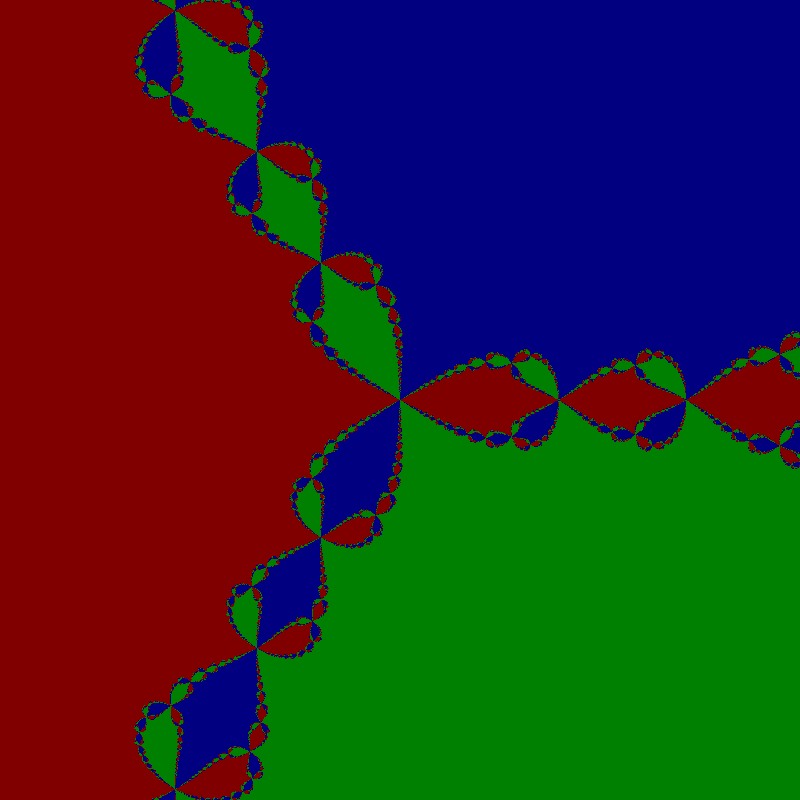

In [21]:
fractal = np.zeros((800, 800, 3), dtype=np.uint8)
for x in range(800):
  for y in range(800):
    if I[x,y] == -1. +0.j:
      fractal[y,x] = [128,0,0] # Red = x, Green = 128, Blue = 0
    if I[x,y].imag > 0:
      fractal[y,x] = [0,128,0]
    if I[x,y].imag < 0:
      fractal[y,x] = [0,0,128]

img = Image.fromarray(fractal) # Create an image from the array.
display(img)

In [23]:
from google.colab import files
img.save('fractal.png')
files.download('fractal.png')  # If you want to download the PNG file to your computer.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>